# Summary
TBA

# Setup

In [1]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')

In [2]:
import torch

# hyperparams to be changed if needed
downstream_path = './downstream_classification/models/3.0-inception-bs128-balanced-death-lr0.001-decay0-aucpr-weighted33.pt'
upstream_path = './upstream_seq2seq/models/transformer_cnn_1696038569.0264485.pt'

## upstream
input_dimension          = 12
output_dimension         = 12
hidden_dimmension        = 64
attention_heads          = None
encoder_number_of_layers = 8
dim_feedforward          = 512
kernel_size              = 3
activation               ='gelu'
dropout                  = 0.4
# ---------------

{'loss_function_weight': 33, 'lr': 0.0005, 'targets': ['one_year_until_death'], 'weight_decay': 0}
*************************************************************************************
* loss_function_weight-33-lr-0.0005-targets-['one_year_until_death']-weight_decay-0 *
*************************************************************************************


training using device: cuda




/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/torch/nn/modules/transformer.py:218: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because  self.layers[0].self_attn.batch_first was not True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


1320081


Within epoch loss (validation) 3.97518: 100%|██████████| 832/832 [01:39<00:00,  8.39it/s]


New best aucpr was found, current best aucpr is 0.0435
---------------------------------------------
Epoch: 01 | Time: 11m 25s
	Train Loss: 4.286
	 Val. Loss: 3.975
	 ROC-AUC: 0.625
	 PR-AUC: 0.043
	 TPR for FPR=0.6 Budget: 0.742
	 Best Val. Loss: inf
---------------------------------------------

{'loss_function_weight': 33, 'lr': 0.0005, 'targets': ['one_year_until_death'], 'weight_decay': 0.0001}
******************************************************************************************
* loss_function_weight-33-lr-0.0005-targets-['one_year_until_death']-weight_decay-0.0001 *
******************************************************************************************


training using device: cuda




/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/torch/nn/modules/transformer.py:218: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because  self.layers[0].self_attn.batch_first was not True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


1320081


Within epoch loss (training) 4.36804:  13%|█▎        | 525/4103 [01:13<08:18,  7.18it/s]


KeyboardInterrupt: 

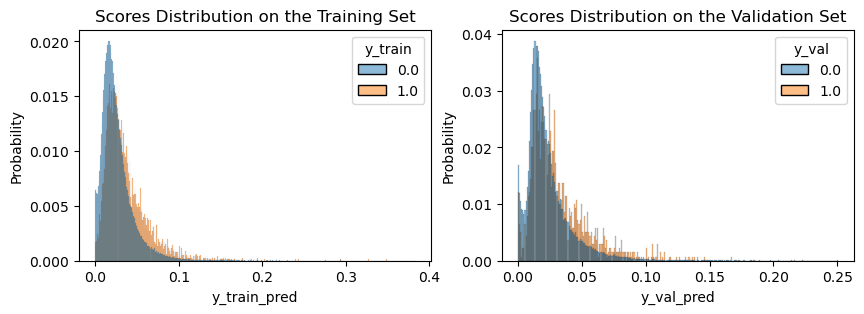

In [5]:
from combined_downstream_upstram.executors.train_on_local_machine_mps import run_experiments, trainer

constants = {
    'seed':42,
    'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
    'data_folder_path': './downstream_classification/data/individual-signals/',
    'fillna': 0,
    'n_epochs':60,
    'batch_size':64, 
    'verbosity': False,
    'patience':5,
    'clip':1,
    'impute_only_missing': True,
    'minimal_number_of_leads': None,
    'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],
    'eval_metric': 'aucpr',
    'minimal_number_of_leads': None,
}
variables = {
    'weight_decay': [0,0.0001,0.0005,0.001],
    'lr': [0.0005,0.001,0.003],
    'loss_function_weight': [33,50,66,100],
    'targets': [['one_year_until_death'],['DM'],['AF']]
}

other_vars = {
        'notebook': '0.4',
        'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    }

run_experiments(other_vars, constants, variables)



# Sandbox

In [ ]:
import sys
sys.exit(0)

In [ ]:
constants = {
    'seed':42,
    'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
    'data_folder_path': './downstream_classification/data/individual-signals/',
    'fillna': 0,
    'n_epochs':60,
    'batch_size':64, 
    'verbosity': False,
    'patience':5,
    'clip':1,
    'impute_only_missing': True,
    'minimal_number_of_leads': None,
    'leads': [['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6']],
    'eval_metric': 'aucpr',
    'minimal_number_of_leads': None,
}
variables = {
    'weight_decay': [0,0.0001,0.0005,0.001],
    'lr': [0.0005,0.001,0.003],
    'loss_function_weight': [33,50,66,100],
    'targets': ['one_year_until_death','DM','AF']
}

other_vars = {
        'notebook': '0.4',
        'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    }

# things to be added internally:
{
    'saving_path':None,
}

# Things I want to see on the table
{
    # 'seed':42,
    # 'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
    # 'data_folder_path': './downstream_classification/data/individual-signals/',
    # 'fillna': 'irrelevant',
    # 'targets': [],
    # 'batch_size':[], 
    # 'n_epochs':[],
    # 'saving_path':[],
    # 'clip':1,
    # 'impute_only_missing': True,
    # 'minimal_number_of_leads': None,
    # 'leads': [['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6']],
    # 'eval_metric': 'loss',
    # 'weight_decay': 0,
    # 'lr': 0.001,
    # 'verbosity': False,
    # 'patience':np.inf,
    # 'loss_function_weight': None,
}

In [ ]:
a = {'s':54}
b = {'a':4}
{**a,**b}

In [ ]:
from sklearn.model_selection import ParameterGrid

hyperparameters = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

grid = ParameterGrid(hyperparameters)

# Iterate over the grid of options
for params in grid:
    print(params)


In [ ]:
'-'.join([f'{k}-{params[k]}' for k in params.keys()])